In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Dec 22 01:07:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Download yoloV5

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jabullae","key":"9615fe6e84855ac0d22aa288ab5d10bd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d kneroma/tacotrashdataset

 99% 2.77G/2.79G [00:18<00:00, 216MB/s]
100% 2.79G/2.79G [00:18<00:00, 161MB/s]


In [ ]:
! unzip /content/tacotrashdataset.zip

Archive:  /content/tacotrashdataset.zip
  inflating: best-checkpoint-003epoch.bin  
  inflating: data/annotations.json   
  inflating: data/batch_1/000000.jpg  
  inflating: data/batch_1/000001.jpg  
  inflating: data/batch_1/000003.jpg  
  inflating: data/batch_1/000004.jpg  
  inflating: data/batch_1/000005.jpg  
  inflating: data/batch_1/000006.jpg  
  inflating: data/batch_1/000007.jpg  
  inflating: data/batch_1/000008.jpg  
  inflating: data/batch_1/000010.jpg  
  inflating: data/batch_1/000011.jpg  
  inflating: data/batch_1/000012.jpg  
  inflating: data/batch_1/000013.jpg  
  inflating: data/batch_1/000014.jpg  
  inflating: data/batch_1/000015.jpg  
  inflating: data/batch_1/000016.jpg  
  inflating: data/batch_1/000017.jpg  
  inflating: data/batch_1/000019.jpg  
  inflating: data/batch_1/000021.jpg  
  inflating: data/batch_1/000022.jpg  
  inflating: data/batch_1/000023.jpg  
  inflating: data/batch_1/000024.jpg  
  inflating: data/batch_1/000025.jpg  
  inflating: data/ba

In [ ]:
%cd /content/drive/MyDrive/MiniProject

/content/drive/MyDrive/MiniProject


In [ ]:
!ls 

 best-checkpoint-003epoch.bin   kaggle.json   tacotrashdataset.zip
 data			        kle_log.txt
'딥러닝 미니프로젝트.ipynb'     meta_df.csv


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd /content/drive/MyDrive/MiniProject/yolov5
%pip install -qr requirements.txt  # install

# %pip install torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks
print (torch.__version__)

YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (4 CPUs, 25.5 GB RAM, 28.1/166.8 GB disk)
1.13.0+cu116


In [ ]:
!ls

benchmarks.py	 data	     LICENSE	      requirements.txt	tutorial.ipynb
CITATION.cff	 detect.py   models	      segment		utils
classify	 export.py   README.md	      setup.cfg		val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py		yolov5


In [ ]:
# !pip uninstall typing -y
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch torchvision torchaudio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import shutil
import numpy as np
import tqdm

In [ ]:
!ls

benchmarks.py	 data	     LICENSE	      requirements.txt	tutorial.ipynb
CITATION.cff	 detect.py   models	      segment		utils
classify	 export.py   README.md	      setup.cfg		val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py		yolov5


**Read the annotations file**

In [ ]:
%cd /content/drive/MyDrive/MiniProject

/content/drive/MyDrive/MiniProject


In [ ]:
from pycocotools.coco import COCO
data_source = COCO(annotation_file='data/annotations.json')

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [ ]:
catIds = data_source.getCatIds()
cats = data_source.loadCats(catIds)


In [ ]:
cats

[{'supercategory': 'Aluminium foil', 'id': 0, 'name': 'Aluminium foil'},
 {'supercategory': 'Battery', 'id': 1, 'name': 'Battery'},
 {'supercategory': 'Blister pack', 'id': 2, 'name': 'Aluminium blister pack'},
 {'supercategory': 'Blister pack', 'id': 3, 'name': 'Carded blister pack'},
 {'supercategory': 'Bottle', 'id': 4, 'name': 'Other plastic bottle'},
 {'supercategory': 'Bottle', 'id': 5, 'name': 'Clear plastic bottle'},
 {'supercategory': 'Bottle', 'id': 6, 'name': 'Glass bottle'},
 {'supercategory': 'Bottle cap', 'id': 7, 'name': 'Plastic bottle cap'},
 {'supercategory': 'Bottle cap', 'id': 8, 'name': 'Metal bottle cap'},
 {'supercategory': 'Broken glass', 'id': 9, 'name': 'Broken glass'},
 {'supercategory': 'Can', 'id': 10, 'name': 'Food Can'},
 {'supercategory': 'Can', 'id': 11, 'name': 'Aerosol'},
 {'supercategory': 'Can', 'id': 12, 'name': 'Drink can'},
 {'supercategory': 'Carton', 'id': 13, 'name': 'Toilet tube'},
 {'supercategory': 'Carton', 'id': 14, 'name': 'Other carton'

In [ ]:
trash = ['Cigarette', 'Unlabeled litter', 'Other plastic wrapper', 'Plastic straw', 'Aluminium foil', 'Tissues',
         'Rope & strings', 'Aluminium blister pack', 'Paper straw', 'Plastic glooves', 'Shoe']
plastic = ['Plastic film', 'Clear plastic bottle', 'Other plastic', 'Plastic bottle cap', 'Disposable plastic cup',
           'Spread tub', 'Other plastic bottle', 'Plastic lid', 'Disposable food container', 'Other plastic cup',
           'Carded blister pack', 'Plastic utensils', 'Squeezable tube', 'Other plastic container', 'Six pack rings',
           'Tupperware', 'Polypropylene bag']
metal = ['Drink can', 'Pop tab', 'Metal bottle cap', 'Food Can', 'Aerosol', 'Metal lid', 'Scrap metal']
glass = ['Broken glass', 'Glass bottle', 'Glass jar', 'Glass cup']
styrofoam = ['Styrofoam piece', 'Foam food container', 'Foam cup']
paper = ['Other carton', 'Plastified paper bag', 'Normal paper', 'Meal carton','Paper cup', 'Corrugated carton', 'Wrapping paper',
         'Toilet tube', 'Magazine paper', 'Egg carton', 'Paper bag', 'Drink carton', 'Pizza box']
vinyl = ['Single-use carrier bag', 'Crisp packet', 'Garbage bag']
food_waste = ['food waste']
battery = ['Battery']

for i in cats:
  if i['name'] in trash:
    i['name'] = 'trash'
    i['id'] = 0
  if i['name'] in plastic:
    i['name'] = 'plastic'
    i['id'] = 1
  if i['name'] in metal:
    i['name'] = 'metal'
    i['id'] = 2
  if i['name'] in glass:
    i['name'] = 'glass'
    i['id'] = 3
  if i['name'] in styrofoam:
    i['name'] = 'styrofoam'
    i['id'] = 4
  if i['name'] in paper:
    i['name'] = 'paper'
    i['id'] = 5
  if i['name'] in vinyl:
    i['name'] = 'vinyl'
    i['id'] = 6
  if i['name'] in food_waste:
    i['name'] = 'food waste'
    i['id'] = 7
  if i['name'] in battery:
    i['name'] = 'battery'
    i['id'] = 8


In [ ]:
cats

[{'supercategory': 'Aluminium foil', 'id': 0, 'name': 'trash'},
 {'supercategory': 'Battery', 'id': 8, 'name': 'battery'},
 {'supercategory': 'Blister pack', 'id': 0, 'name': 'trash'},
 {'supercategory': 'Blister pack', 'id': 1, 'name': 'plastic'},
 {'supercategory': 'Bottle', 'id': 1, 'name': 'plastic'},
 {'supercategory': 'Bottle', 'id': 1, 'name': 'plastic'},
 {'supercategory': 'Bottle', 'id': 3, 'name': 'glass'},
 {'supercategory': 'Bottle cap', 'id': 1, 'name': 'plastic'},
 {'supercategory': 'Bottle cap', 'id': 2, 'name': 'metal'},
 {'supercategory': 'Broken glass', 'id': 3, 'name': 'glass'},
 {'supercategory': 'Can', 'id': 2, 'name': 'metal'},
 {'supercategory': 'Can', 'id': 2, 'name': 'metal'},
 {'supercategory': 'Can', 'id': 2, 'name': 'metal'},
 {'supercategory': 'Carton', 'id': 5, 'name': 'paper'},
 {'supercategory': 'Carton', 'id': 5, 'name': 'paper'},
 {'supercategory': 'Carton', 'id': 5, 'name': 'paper'},
 {'supercategory': 'Carton', 'id': 5, 'name': 'paper'},
 {'supercate

**Creating a class Dictionary**
* `classes` = Mapping of Class Name to ID

In [ ]:
annotation

{'id': 2,
 'image_id': 1,
 'category_id': 18,
 'segmentation': [[928.0,
   1876.0,
   938.0,
   1856.0,
   968.0,
   1826.0,
   990.0,
   1808.0,
   998.0,
   1790.0,
   1069.0,
   1727.0,
   1096.0,
   1702.0,
   1159.0,
   1644.0,
   1212.0,
   1588.0,
   1258.0,
   1540.0,
   1314.0,
   1482.0,
   1357.0,
   1444.0,
   1392.0,
   1416.0,
   1409.0,
   1393.0,
   1430.0,
   1369.0,
   1415.0,
   1347.0,
   1130.0,
   1087.0,
   780.0,
   763.0,
   528.0,
   533.0,
   479.0,
   486.0,
   466.0,
   466.0,
   448.0,
   457.0,
   427.0,
   468.0,
   387.0,
   502.0,
   321.0,
   554.0,
   244.0,
   608.0,
   118.0,
   693.0,
   37.0,
   750.0,
   3.0,
   780.0,
   1.0,
   995.0,
   28.0,
   1032.0,
   104.0,
   1119.0,
   403.0,
   1471.0,
   666.0,
   1805.0,
   763.0,
   1954.0,
   782.0,
   1945.0,
   796.0,
   1970.0,
   803.0,
   1976.0,
   818.0,
   1976.0,
   836.0,
   1956.0,
   852.0,
   1954.0,
   860.0,
   1937.0,
   873.0,
   1931.0,
   885.0,
   1908.0,
   898.0,
   1896.0,


In [ ]:
classes = {'trash' : 0,
           'plastic' : 1,
           'metal' : 2,
           'glass' : 3,
           'styrofoam' : 4,
           'paper' : 5,
           'vinyl' : 6,
           'food waste' : 7,
           'battery' : 8}
taco_labels = {0:0,
               1:1,
               2:2,
               3:3,
               4:4,
               5:5,
               6:6,
               7:7,
               8:8,
               }
taco_labels_inverse = {0:0,
                      1:8,
                      2:0,
                      3:1,
                      4:1,
                      5:1,
                      6:3,
                      7:1,
                      8:2,
                       9:3,
                       10:2,
                       11:2,
                       12:2,
                       13:5,
                       14:5,
                       15:5,
                       16:5,
                       17:5,
                       18:5,
                       19:5,
                       20:5,
                       21:1,
                       22:4,
                       23:3,
                       24:1,
                       25:7,
                       26:3,
                       27:1,
                       28:2,
                       29:1,
                       30:5,
                       31:0,
                       32:5,
                       33:5,
                       34:5,
                       35:5,
                       36:1,
                       37:1,
                       38:6,
                       39:0,
                       40:6,
                       41:1,
                       42:6,
                       43:1,
                       44:1,
                       45:1,
                       46:4,
                       47:1,
                       48:0,
                       49:1,
                       50:2,
                       51:0,
                       52:2,
                       53:0,
                       54:1,
                       55:0,
                       56:0,
                       57:4,
                       58:0,
                       59:0}

In [ ]:
# classes = {}
# taco_labels = {}
# taco_labels_inverse = {}

# for c in cats:
#     taco_labels[len(classes)] = c['id']
#     taco_labels_inverse[c['id']] = len(classes)
#     classes[c['name']] = len(classes)

**Splitting data into train, val and test**

In [ ]:
!ls

 best-checkpoint-003epoch.bin   kaggle.json   tacotrashdataset.zip
 data			        kle_log.txt   yolov5
'딥러닝 미니프로젝트.ipynb'     meta_df.csv


In [ ]:
%cd /content/drive/MyDrive/MiniProject/yolov5
!mkdir -p tmp/labels tmp/images
IMAGES_PATH = 'tmp/images/'
LABELS_PATH = 'tmp/labels/'

/content/drive/MyDrive/MiniProject/yolov5


In [ ]:
!ls tmp

images	labels


In [ ]:
import shutil
import os

In [ ]:
imgIds = data_source.getImgIds()
# print(data_source.loadImgs(0)[0])
for index, img_id in tqdm.tqdm(enumerate(imgIds)):
    img_info = data_source.loadImgs(img_id)[0]
      # img_dir: batch_x/.....jpg ---> batch_x_......jpg
    img_dir = img_info['file_name'].replace('/', '-')
    
    image_name = img_dir.split('.')[0]
    label_dir = LABELS_PATH + image_name + '.txt'
    
    height = img_info['height']
    width = img_info['width']
    
#     print ("Copying from /kaggle/input/tacotrashdataset/data/{} to {}".format(img_info['file_name'], os.path.join(IMAGES_PATH, img_dir)))
    # get images
    shutil.copy(f"/content/drive/MyDrive/MiniProject/data/{img_info['file_name']}", os.path.join(IMAGES_PATH, img_dir))
        

    
      # get labels
    with open(label_dir, mode='w') as fp:
#         print (f"Creating label_dir {label_dir} for {image_name}")
        annotation_id = data_source.getAnnIds(img_id)
        if len(annotation_id) == 0:
            fp.write('')
            continue
        boxes = np.zeros((0, 5))
        annotations = data_source.loadAnns(annotation_id)
        lines = ''
        for annotation in annotations:
            label = taco_labels_inverse[annotation['category_id']]
            box = annotation['bbox']
            # some annotations have basically no width / height (extremely small), skip them
            if box[2] < 1 or box[3] < 1:
                continue
            # top_x,top_y,width,height ----> cen_x,cen_y,width,height
            # standardize to 0-1
            box[0] = round((box[0] + box[2] / 2) / width, 6)
            box[1] = round((box[1] + box[3] / 2) / height, 6)
            box[2] = round(box[2] / width, 6)
            box[3] = round(box[3] / height, 6)
            # line: label x_center y_center width height
            lines = lines + str(label)
            for i in box:
                lines += ' ' + str(i)
            lines += '\n'
        fp.writelines(lines)

1500it [06:53,  3.63it/s]


In [ ]:
!ls

benchmarks.py	 detect.py   README.md	       tmp	       yolov5
CITATION.cff	 export.py   README.zh-CN.md   train.py
classify	 hubconf.py  requirements.txt  tutorial.ipynb
CONTRIBUTING.md  LICENSE     segment	       utils
data		 models      setup.cfg	       val.py


In [ ]:
# test
annotation_id = data_source.getAnnIds(1)
data_source.loadAnns(annotation_id)

[{'id': 2,
  'image_id': 1,
  'category_id': 18,
  'segmentation': [[928.0,
    1876.0,
    938.0,
    1856.0,
    968.0,
    1826.0,
    990.0,
    1808.0,
    998.0,
    1790.0,
    1069.0,
    1727.0,
    1096.0,
    1702.0,
    1159.0,
    1644.0,
    1212.0,
    1588.0,
    1258.0,
    1540.0,
    1314.0,
    1482.0,
    1357.0,
    1444.0,
    1392.0,
    1416.0,
    1409.0,
    1393.0,
    1430.0,
    1369.0,
    1415.0,
    1347.0,
    1130.0,
    1087.0,
    780.0,
    763.0,
    528.0,
    533.0,
    479.0,
    486.0,
    466.0,
    466.0,
    448.0,
    457.0,
    427.0,
    468.0,
    387.0,
    502.0,
    321.0,
    554.0,
    244.0,
    608.0,
    118.0,
    693.0,
    37.0,
    750.0,
    3.0,
    780.0,
    1.0,
    995.0,
    28.0,
    1032.0,
    104.0,
    1119.0,
    403.0,
    1471.0,
    666.0,
    1805.0,
    763.0,
    1954.0,
    782.0,
    1945.0,
    796.0,
    1970.0,
    803.0,
    1976.0,
    818.0,
    1976.0,
    836.0,
    1956.0,
    852.0,
    1954.0,

In [ ]:
print(len(os.listdir(IMAGES_PATH)))
print(len(os.listdir(LABELS_PATH)))

1500
1500


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
%cd /content/drive/MyDrive/MiniProject/yolov5
splitfolders.ratio('tmp', output='taco', seed=1337, ratio=(.8, 0.1,0.1)) 

/content/drive/MyDrive/MiniProject/yolov5


Copying files: 3000 files [00:40, 74.52 files/s]


In [ ]:
!ls taco

test  train  val


In [ ]:
# check files
print(sorted(os.listdir('taco/train/images'))[:5])
print(sorted(os.listdir('taco/val/images'))[:5])
print(sorted(os.listdir('taco/test/images'))[:5])

['batch_1-000001.jpg', 'batch_1-000003.jpg', 'batch_1-000004.jpg', 'batch_1-000005.jpg', 'batch_1-000007.jpg']
['batch_1-000000.jpg', 'batch_1-000006.jpg', 'batch_1-000016.jpg', 'batch_1-000030.jpg', 'batch_1-000038.jpg']
['batch_1-000029.jpg', 'batch_1-000045.jpg', 'batch_1-000047.jpg', 'batch_1-000065.JPG', 'batch_1-000108.JPG']


In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    print(line)
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%cd /content/drive/MyDrive/MiniProject/yolov5
!ls

/content/drive/MyDrive/MiniProject/yolov5
benchmarks.py	 detect.py   README.md	       taco	       val.py
CITATION.cff	 export.py   README.zh-CN.md   tmp	       yolov5
classify	 hubconf.py  requirements.txt  train.py
CONTRIBUTING.md  LICENSE     segment	       tutorial.ipynb
data		 models      setup.cfg	       utils


In [ ]:
%%writetemplate data/taco9.yaml

train: taco/train/images
val:   taco/val/images

# number of classes
nc: 9

# class names
names: ['trash',
        'plastic',
        'metal',
        'glass',
        'styrofoam',
        'paper',
        'vinyl',
        'food waste',
        'battery']


data/taco9.yaml


In [ ]:
!pwd

/content/drive/MyDrive/MiniProject/yolov5


In [ ]:
%cd /content/drive/MyDrive/MiniProject/yolov5
# %cd yolov5
%cat data/taco9.yaml

/content/drive/MyDrive/MiniProject/yolov5

train: taco/train/images
val:   taco/val/images

# number of classes
nc: 9

# class names
names: ['trash',
        'plastic',
        'metal',
        'glass',
        'styrofoam',
        'paper',
        'vinyl',
        'food waste',
        'battery']


In [ ]:
# Removing the tmp folder

!rm -r tmp

In [ ]:

!wandb disabled

/bin/bash: wandb: command not found


In [ ]:
!pwd

/content/drive/MyDrive/MiniProject/yolov5


In [ ]:
import time
start = time.time()
!python train.py --img 640 --batch 16 --epochs 10 --data taco9.yaml --weights yolov5s.pt

end = time.time() 

train: weights=yolov5s.pt, cfg=, data=taco9.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, de

In [ ]:
print (f"Time Elapsed: {end-start}")

Time Elapsed: 2547.599770307541


**See results**

In [ ]:
%cd /content/drive/MyDrive/MiniProject/yolov5/runs/train/exp

/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp


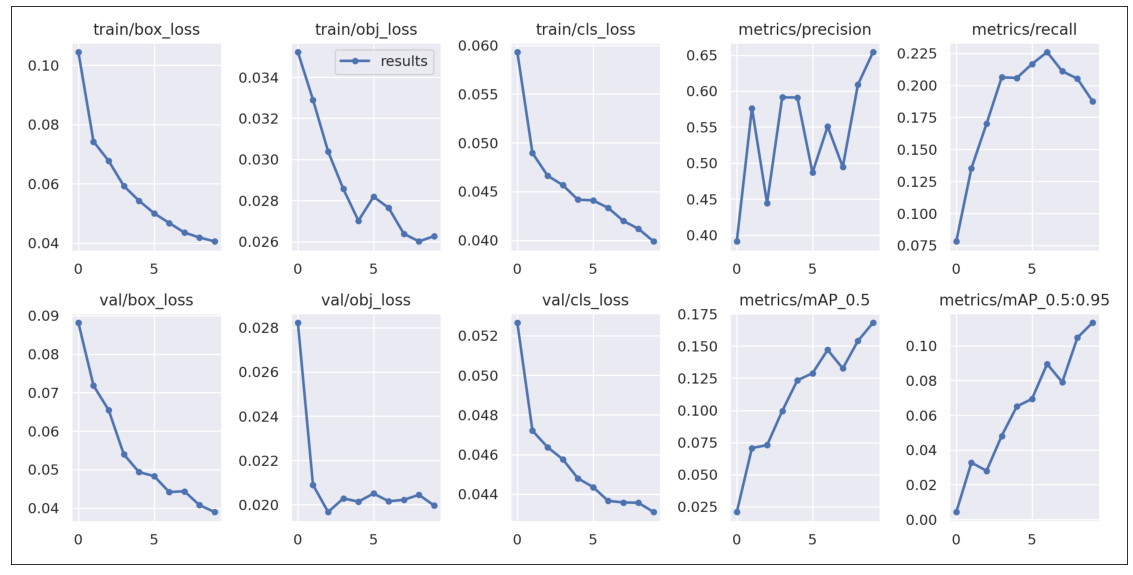

In [ ]:
import matplotlib.pyplot as plt
res_path = 'results.png'
img = plt.imread(res_path)
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import pandas as pd

pd.read_csv('results.csv')

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.104440,0.035222,0.059318,0.39132,...,0.028230,0.052652,0.070400,0.003289,0.003289
1,1,0.074225,0.032899,0.048947,0.57636,...,0.020887,0.047200,0.039744,0.005967,0.005967
2,2,0.067726,0.030381,0.046625,0.44461,...,0.019659,0.046368,0.008429,0.007984,0.007984
3,3,0.059241,0.028564,0.045664,0.59134,...,0.020276,0.045761,0.007030,0.007030,0.007030
4,4,0.054287,0.027014,0.044166,0.59102,...,0.020130,0.044799,0.007030,0.007030,0.007030
5,5,0.050036,0.028181,0.044095,0.48671,...,0.020498,0.044359,0.006040,0.006040,0.006040
6,6,0.046767,0.027637,0.043325,0.55099,...,0.020145,0.043660,0.005050,0.005050,0.005050
7,7,0.043522,0.026377,0.041985,0.49461,...,0.020212,0.043584,0.004060,0.004060,0.004060
8,8,0.041866,0.026007,0.041173,0.60888,...,0.020439,0.043565,0.003070,0.003070,0.003070
9,9,0.040539,0.026262,0.039880,0.65419,...,0.019953,0.043098,0.002080,0.002080,0.002080


In [ ]:
!cat /content/drive/MyDrive/MiniProject/yolov5/runs/train/exp/results.csv

               epoch,      train/box_loss,      train/obj_loss,      train/cls_loss,   metrics/precision,      metrics/recall,     metrics/mAP_0.5,metrics/mAP_0.5:0.95,        val/box_loss,        val/obj_loss,        val/cls_loss,               x/lr0,               x/lr1,               x/lr2
                   0,             0.10444,            0.035222,            0.059318,             0.39132,            0.078145,            0.020894,           0.0042781,            0.088175,             0.02823,            0.052652,              0.0704,           0.0032889,           0.0032889
                   1,            0.074225,            0.032899,            0.048947,             0.57636,             0.13522,            0.070717,            0.032707,            0.071818,            0.020887,              0.0472,            0.039744,           0.0059666,           0.0059666
                   2,            0.067726,            0.030381,            0.046625,             0.44461,             

<a href="/kaggle/working/yolov5/runs/train/exp/results.csv"> Download File </a>


In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp')
from IPython.display import FileLink
FileLink(r'results.csv')

/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp/results.csv

In [ ]:
%cd /content/drive/MyDrive/MiniProject/yolov5

/content/drive/MyDrive/MiniProject/yolov5


In [ ]:
# !cp runs/exp/weights/best.pt weights
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source taco/test/images 

detect: weights=['runs/train/exp/weights/best.pt'], source=taco/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 /content/drive/MyDrive/MiniProject/yolov5/taco/test/images/batch_1-000029.jpg: 640x480 1 plastic, 12.7ms
image 2/150 /content/drive/MyDrive/MiniProject/yolov5/taco/test/images/batch_1-000045.jpg: 480x640 3 plastics, 1 paper, 19.1ms
image 3/150 /content/drive/MyDrive/MiniProject/yolov5/taco/test/images/batch_1-000047.jpg: 480x640 4 plasti

In [ ]:
!pwd

/content/drive/MyDrive/MiniProject/yolov5


In [ ]:
!ls runs/detect/exp

batch_10-000002.jpg  batch_15-000028.jpg   batch_6-000061.JPG
batch_10-000008.jpg  batch_15-000029.jpg   batch_6-000064.JPG
batch_10-000009.jpg  batch_15-000035.jpg   batch_6-000066.JPG
batch_10-000013.jpg  batch_15-000041.jpg   batch_6-000073.JPG
batch_10-000019.jpg  batch_15-000042.jpg   batch_6-000096.JPG
batch_10-000032.jpg  batch_15-000046.jpg   batch_6-000097.JPG
batch_10-000035.jpg  batch_15-000080.jpg   batch_6-000101.JPG
batch_10-000036.jpg  batch_15-000082.jpg   batch_6-000103.JPG
batch_10-000039.jpg  batch_2-000029.JPG    batch_7-000011.JPG
batch_10-000046.jpg  batch_2-000030.JPG    batch_7-000024.JPG
batch_10-000059.jpg  batch_2-000033.JPG    batch_7-000031.JPG
batch_1-000029.jpg   batch_2-000039.JPG    batch_7-000053.JPG
batch_1-000045.jpg   batch_2-000040.JPG    batch_7-000068.JPG
batch_1-000047.jpg   batch_2-000041.JPG    batch_7-000073.JPG
batch_1-000065.JPG   batch_2-000055.JPG    batch_7-000077.JPG
batch_1-000108.JPG   batch_2-000067.JPG    batch_7-000080.JPG
batch_1-

In [ ]:
import glob
from IPython.display import Image, display

def inspectPerformance(mode, run):
    cnt = 0 
    %cd yolov5
    for imageName in glob.glob('runs/{}/{}/*.jpg'.format(mode,run)): #assuming JPG
        display(Image(filename=imageName))
        print("\n")
        cnt += 1
        if cnt == 5:
            break

In [ ]:
# we use the helper function defined above to view the TEST results from EXP __ (we can see this from the last line in the 
# log output after running the test command)
inspectPerformance("detect", "exp") # change 'exp19' to the name of your test_run

[Errno 2] No such file or directory: 'yolov5'
/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp


In [ ]:
!python test.py

python3: can't open file 'test.py': [Errno 2] No such file or directory


**Show Training Result**

In [ ]:
%cd '/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp'
%ls

/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp
confusion_matrix.png                                 results.png
events.out.tfevents.1671619685.00dc3df206d5.18727.0  train_batch0.jpg
F1_curve.png                                         train_batch1.jpg
hyp.yaml                                             train_batch2.jpg
labels_correlogram.jpg                               val_batch0_labels.jpg
labels.jpg                                           val_batch0_pred.jpg
opt.yaml                                             val_batch1_labels.jpg
P_curve.png                                          val_batch1_pred.jpg
PR_curve.png                                         val_batch2_labels.jpg
R_curve.png                                          val_batch2_pred.jpg
results.csv                                          weights/


In [ ]:
inspectPerformance("train", "exp")

[Errno 2] No such file or directory: 'yolov5'
/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp


In [ ]:
!pwd
%cd /content/drive/MyDrive/MiniProject

/content/drive/MyDrive/MiniProject/yolov5/runs/train/exp
/content/drive/MyDrive/MiniProject


In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source taco_yolov5_sample.mp4

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=taco_yolov5_sample.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/382) /content/drive/MyDrive/MiniProject/taco_yolov5_sample.mp4: 640x384 6 plastics, 2 papers, 15.1ms
video 1/1 (2/382) /content/drive/MyDrive/MiniProject/taco_yolov5_sample.mp4: 640x384 6 plastics, 2 papers, 9.6ms
video 1/1 (3/382) /content/drive/MyDrive/MiniProject/taco_yolov5_sample.mp4: 640x384 6 plastics,

In [ ]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.3 --source /content/쓰레기2.mp4 

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/쓰레기2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/168) /content/쓰레기2.mp4: 640x384 1 paper, 17.2ms
video 1/1 (2/168) /content/쓰레기2.mp4: 640x384 2 papers, 10.6ms
video 1/1 (3/168) /content/쓰레기2.mp4: 640x384 1 paper, 10.4ms
video 1/1 (4/168) /content/쓰레기2.mp4: 640x384 1 paper, 10.5ms
video 1/1 (5/168) /content/쓰레기2.mp4: 640x384 (no detections), 10.4ms
video 1/1 (6/168) /content/쓰레

In [ ]:
!pwd

/content/drive/MyDrive/MiniProject


In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.2 --source /content/drive/MyDrive/MiniProject/영현이책상.jpg 

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/MiniProject/영현이책상.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/MiniProject/영현이책상.jpg: 480x640 6 plastics, 2 metals, 6 papers, 12.0ms
Speed: 0.5ms pre-process, 12.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp8


# 웹 페이지 연동

In [ ]:
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 5.0 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=4fb43a4b1f92f0612011ba1d158cf354b1fc2666ac5830ad69baf476d4ef9e00
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token('2JFPkLDW2mwrfm9cQbgAn8CBtrT_3KNHsYRxrh4p47Mag2MDz')

In [ ]:
%cd /content/drive/MyDrive/MiniProject/web

/content/drive/MyDrive/MiniProject/web
